In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import voxart

In [16]:
import importlib
importlib.reload(voxart)

<module 'voxart' from '/Users/priley/side_projects/voxart/voxart/__init__.py'>

# XYZ

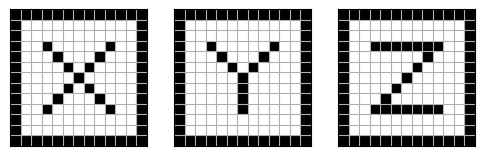

In [3]:
goal_xyz = voxart.Goal.from_image(Image.open("../assets/xyz_13.png"))
goal_xyz.fig()

In [17]:
results_filled = voxart.search(goal_xyz, "random_clear_front", num_iterations=10, top_n=1)
_, design_xyz = results_filled.best()[0]

  0%|          | 0/16 [00:00<?, ?it/s]

In [18]:
df_results = results_filled.all_objective_values()
df_results.sample(5)

,form_idx,is_starting,iteration,objective_value
38,3,False,4,111.0
0,0,True,-1,366.0
82,7,False,4,89.0
9,0,False,8,106.0
112,10,False,1,106.0


<AxesSubplot: xlabel='iteration', ylabel='objective_value'>

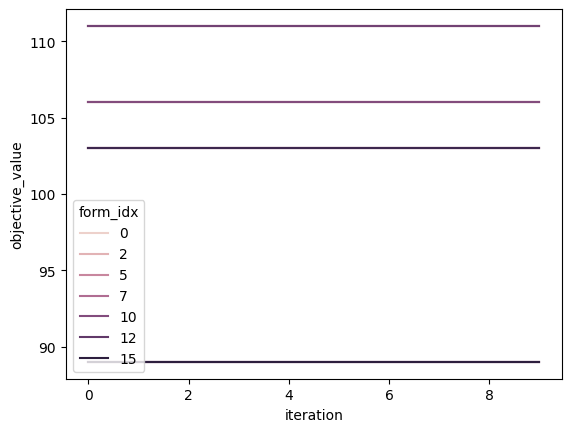

In [19]:
sns.lineplot(df_results[~df_results["is_starting"]], x="iteration", y="objective_value", hue="form_idx")

<AxesSubplot: xlabel='form_idx', ylabel='objective_value'>

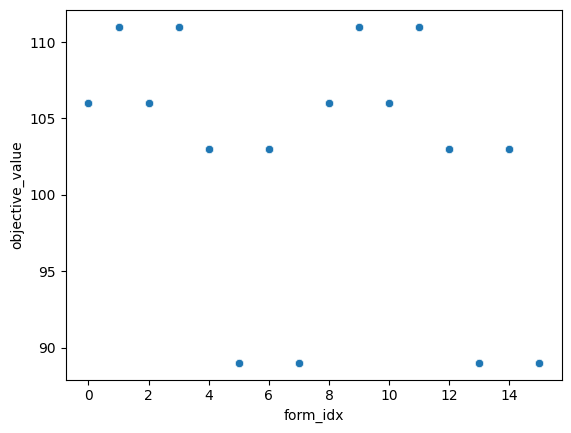

In [22]:
sns.scatterplot(data=df_results[~df_results["is_starting"]], x="form_idx", y="objective_value")

In [20]:
df_results[~df_results["is_starting"]].groupby("form_idx").describe()

iteration                                          objective_value  \
             count mean      std  min   25%  50%   75%  max           count   
form_idx                                                                      
0             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
1             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
2             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
3             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
4             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
5             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
6             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
7             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
8             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
9             10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
10            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
11            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
12            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
13            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
14            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   
15            10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0            10.0   

                                                         
           mean  std    min    25%    50%    75%    max  
form_idx                                                 
0         106.0  0.0  106.0  106.0  106.0  106.0  106.0  
1         111.0  0.0  111.0  111.0  111.0  111.0  111.0  
2         106.0  0.0  106.0  106.0  106.0  106.0  106.0  
3         111.0  0.0  111.0  111.0  111.0  111.0  111.0  
4         103.0  0.0  103.0  103.0  103.0  103.0  103.0  
5          89.0  0.0   89.0   89.0   89.0   89.0   89.0  
6         103.0  0.0  103.0  103.0  103.0  103.0  103.0  
7          89.0  0.0   89.0   89.0   89.0   89.0   89.0  
8         106.0  0.0  106.0  106.0  106.0  106.0  106.0  
9         111.0  0.0  111.0  111.0  111.0  111.0  111.0  
10        106.0  0.0  106.0  106.0  106.0  106.0  106.0  
11        111.0  0.0  111.0  111.0  111.0  111.0  111.0  
12        103.0  0.0  103.0  103.0  103.0  103.0  103.0  
13         89.0  0.0   89.0   89.0   89.0   89.0   89.0  
14        103.0  0.0  103.0  103.0  103.0  103.0  103.0  
15         89.0  0.0   89.0   89.0   89.0   89.0   89.0

  0%|          | 0/50 [00:00<?, ?it/s]

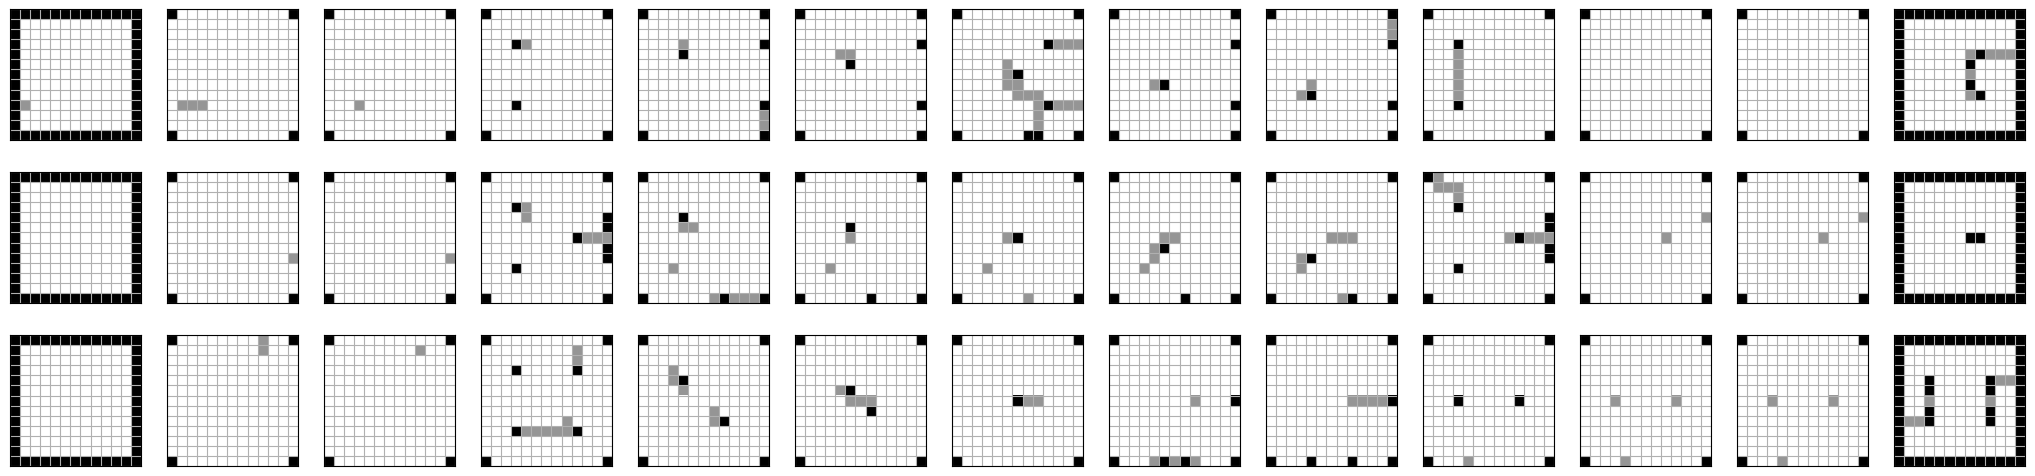

In [34]:
results_conn = voxart.search_connectors(design_xyz, num_iterations=50, top_n=1)
_, design_xyz_conn = results_conn.best()[0]
display(design_xyz_conn.slices_fig())

,iteration,num_connectors,objective_value
4,4,47,136.0
21,21,44,133.0
34,34,45,134.0


<AxesSubplot: xlabel='iteration', ylabel='num_connectors'>

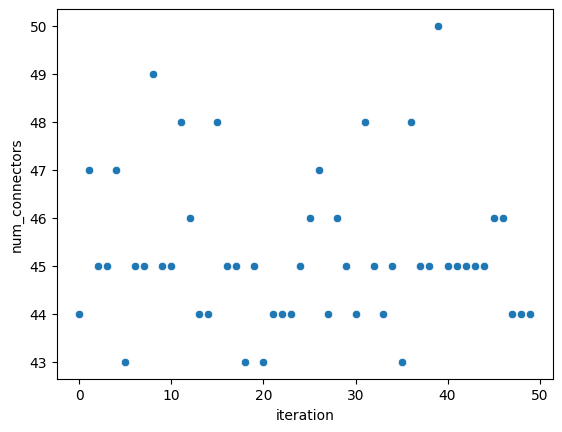

In [35]:
df_results_conn = results_conn.all_objective_values()
display(df_results_conn.sample(3))
sns.scatterplot(data=df_results_conn, x="iteration", y="num_connectors")

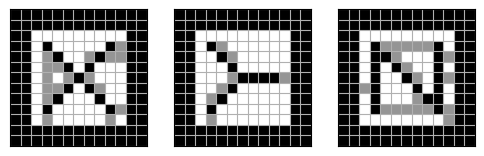

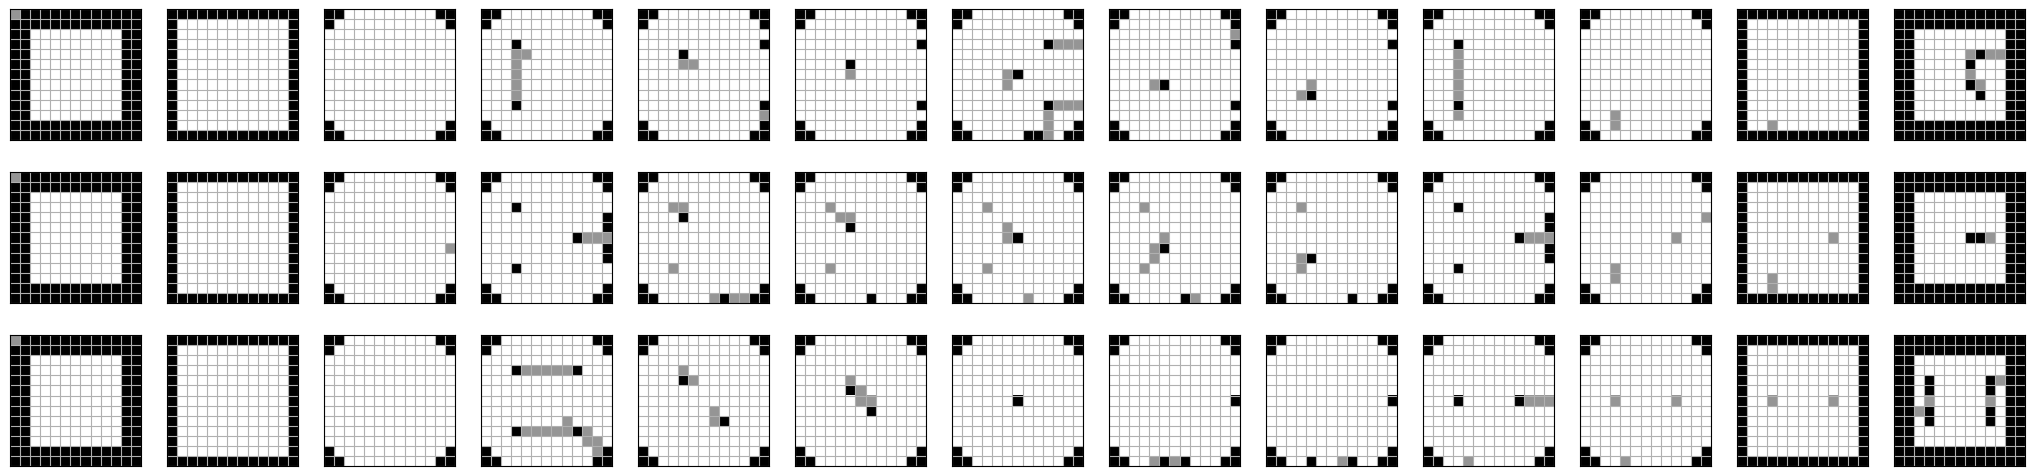

In [5]:
design_xyz_conn.add_frame(1)
design_xyz_conn.voxels[tuple(design_xyz_conn.goal_locations)] = voxart.CONNECTOR
display(design_xyz_conn.projections_fig())
display(design_xyz_conn.slices_fig())

In [6]:
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_cube", connector_style="cube", separate_files=True)
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_strut", connector_style="strut", separate_files=False)

In [7]:
voxart.connect_faces(design_xyz_conn)
voxart.save_stl(design_xyz_conn, "/Users/priley/tmp/xyz_face_conn", connector_style="strut", separate_files=False)

# PFR

In [23]:
goal_pfr = voxart.Goal.from_image(Image.open("../assets/pfr_13.png"))
goal_pfr.fig()
results_filled = voxart.search(goal_pfr, "random_clear_front", num_iterations=50, top_n=50)
label, design_pfr_conn = results_filled.best()[0]
print(label)

  0%|          | 0/64 [00:00<?, ?it/s]

(0, False, 1)


In [24]:
df_results_filled = results_filled.all_objective_values()

<AxesSubplot: xlabel='iteration', ylabel='objective_value'>

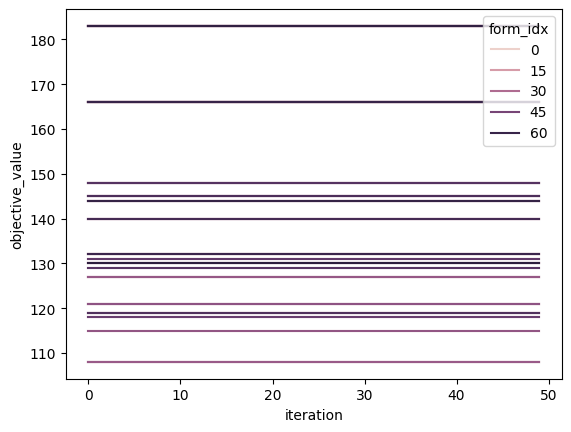

In [25]:
sns.lineplot(df_results_filled[~df_results_filled["is_starting"]], x="iteration", y="objective_value", hue="form_idx")

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

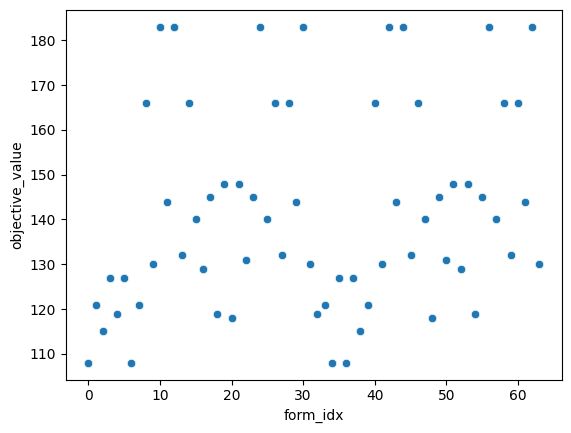

In [28]:
g = sns.scatterplot(data=df_results_filled[~df_results_filled["is_starting"]], x="form_idx", y="objective_value")
dir(g)

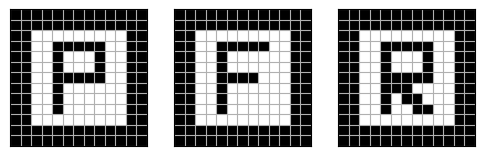

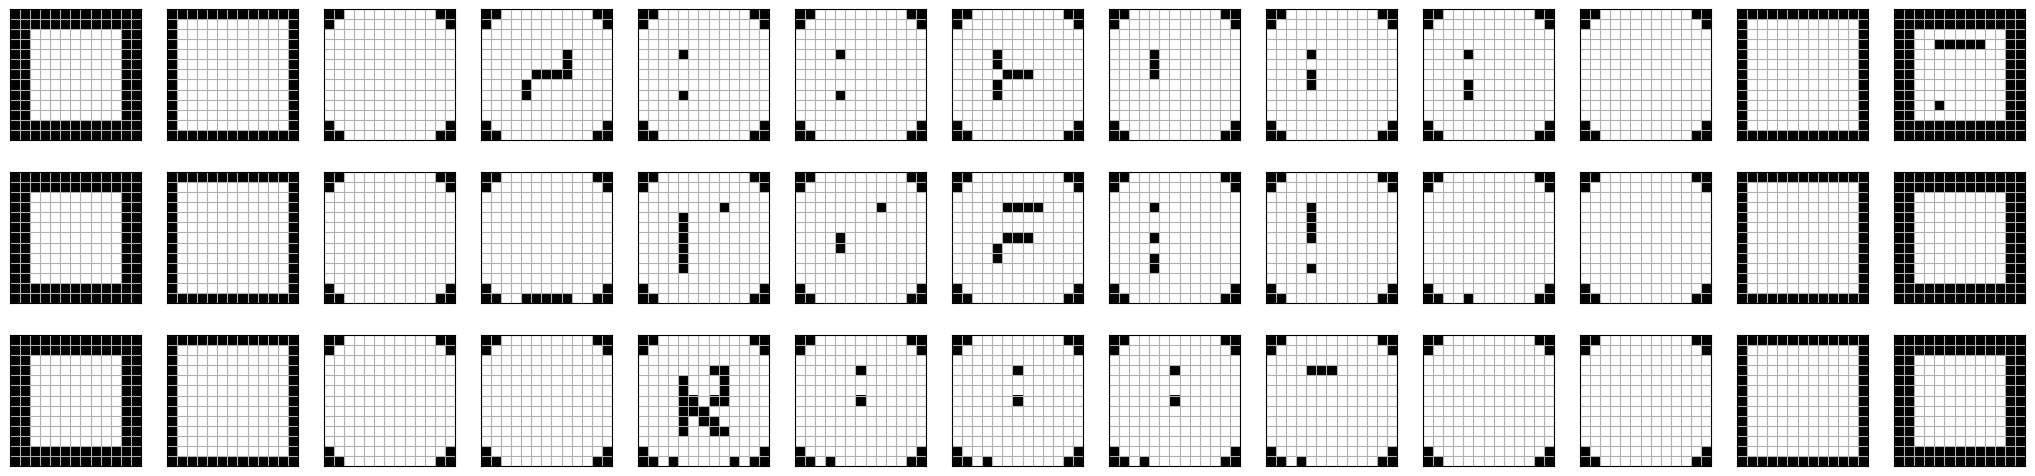

In [15]:
design_pfr_conn.add_frame(1)
display(design_pfr_conn.projections_fig())`
display(design_pfr_conn.slices_fig())